In [30]:
#importing python libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [92]:
dataset_b_dir = '../raw_data/Dataset_B_FORWW_Kaggle'

csv_filename = 'All_Airports.csv'

df = pd.read_csv(os.path.join(dataset_b_dir,csv_filename), compression='zip')

In [93]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Origin                  object 
 2   Dest                    object 
 3   Carrier                 object 
 4   Cancelled               bool   
 5   CancellationReason      object 
 6   Delayed                 bool   
 7   DepDelayMinutes         float64
 8   CarrierDelay            float64
 9   WeatherDelay            float64
 10  NASDelay                float64
 11  SecurityDelay           float64
 12  LateAircraftDelay       float64
 13  Temperature             float64
 14  Feels_Like_Temperature  float64
 15  Altimeter_Pressure      float64
 16  Sea_Level_Pressure      float64
 17  Visibility              float64
 18  Wind_Speed              float64
 19  Wind_Gust               float64
 20  Precipitation           float64
 21  Ice_Accretion_3hr       float

In [94]:
round(df.describe(),2)

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,14815623.00,3274328.00,3274328.00,3274328.00,3274328.00,3274328.00,15144514.00,15144514.00,15144514.00,15144514.00,15144514.00,15144514.00,15144514.00,15144514.00,15144514.00
mean,16.09,25.52,5.42,12.45,0.15,24.40,63.17,62.19,1016.33,1016.16,14522.99,9.07,26.09,0.17,0.00
std,51.53,67.65,34.79,28.83,3.61,56.12,18.05,21.01,6.50,6.17,30318.96,5.42,3.10,1.30,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00,-22.00,-40.86,116.49,907.80,0.00,0.00,9.21,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,51.00,51.10,1012.53,1012.80,16093.40,5.75,24.74,0.00,0.00
50%,0.00,6.00,0.00,0.00,0.00,0.00,65.00,64.90,1016.26,1016.20,16093.40,8.06,26.24,0.00,0.00
75%,11.00,26.00,0.00,17.00,0.00,27.00,76.00,76.00,1020.32,1019.30,16093.40,12.66,27.62,0.00,0.00
max,3695.00,3221.00,1805.00,1409.00,1183.00,3581.00,119.00,118.60,1042.33,1068.40,33804186.70,281.94,96.67,82.30,11.94


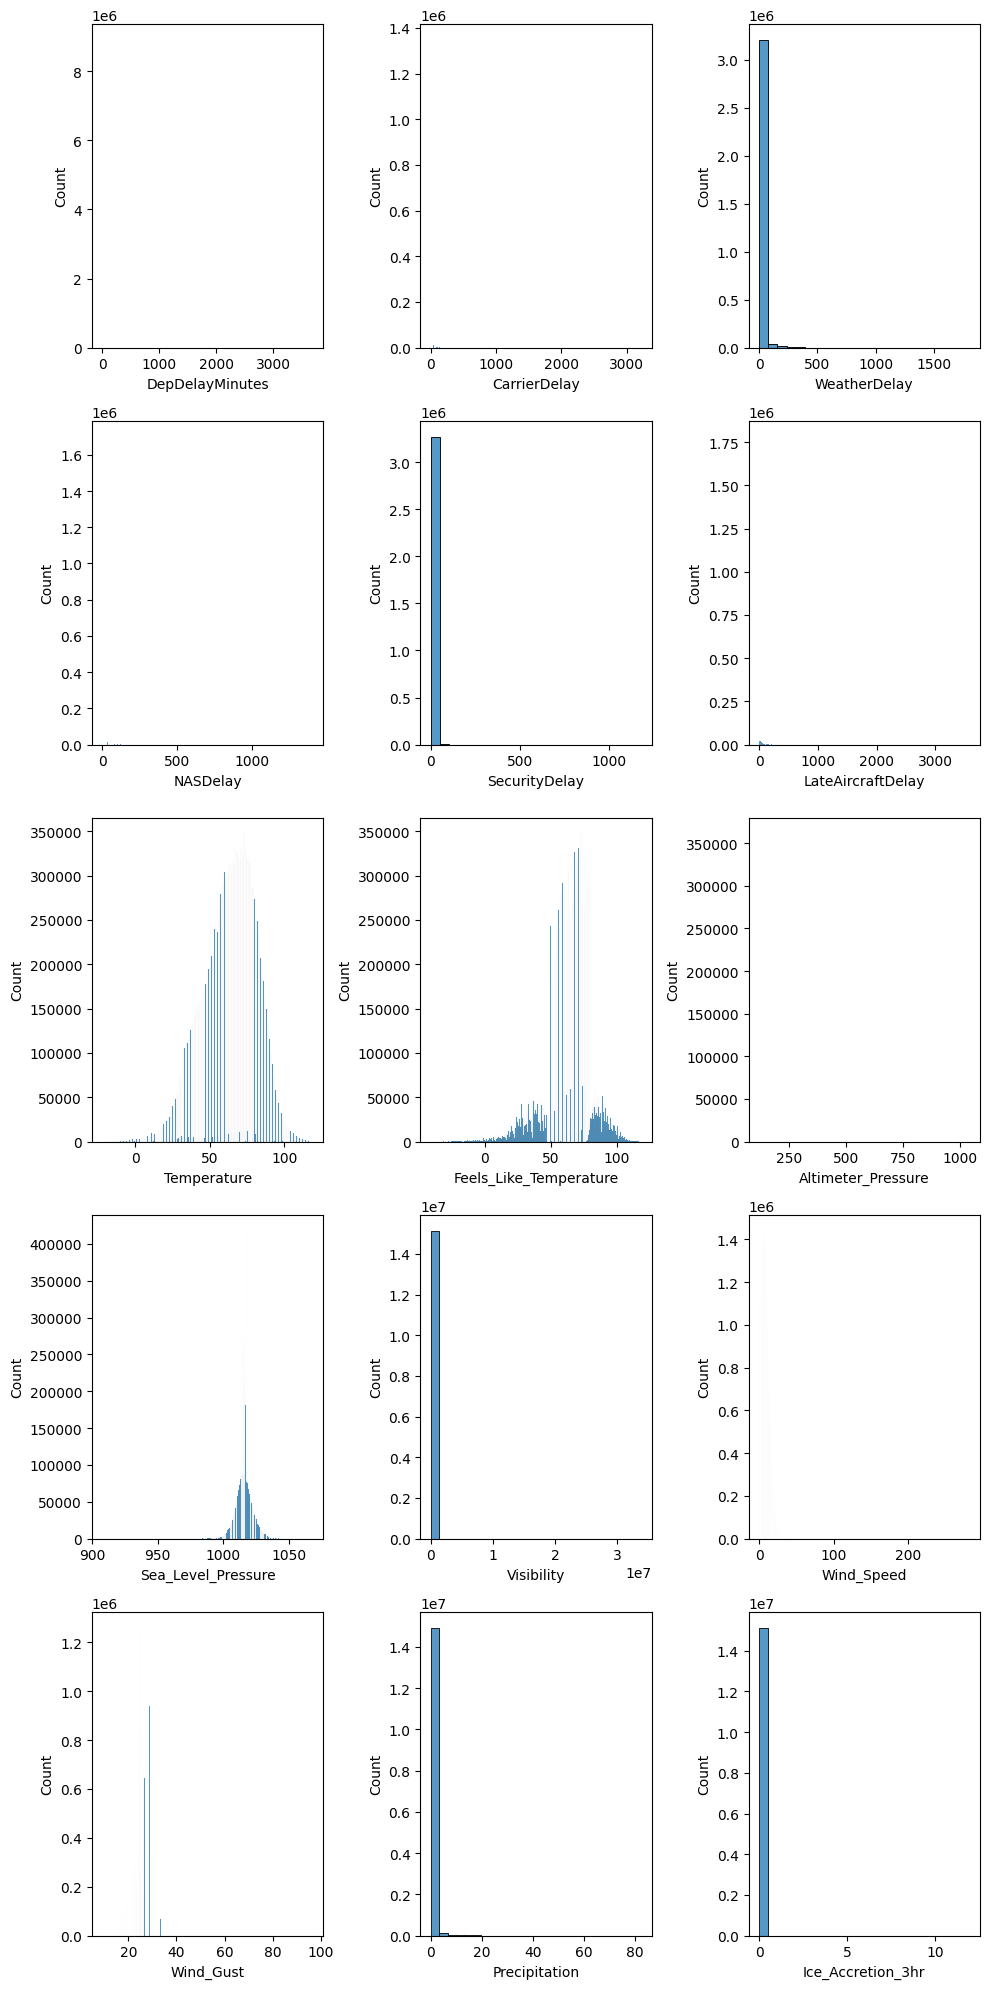

In [95]:
fig, axes = plt.subplots(nrows=5,ncols=3, figsize=(10,20))

axes= axes.flatten()

num_features = df[['DepDelayMinutes', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr']]


for i, col in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=col, ax=axes[i])

plt.tight_layout()
plt.show()


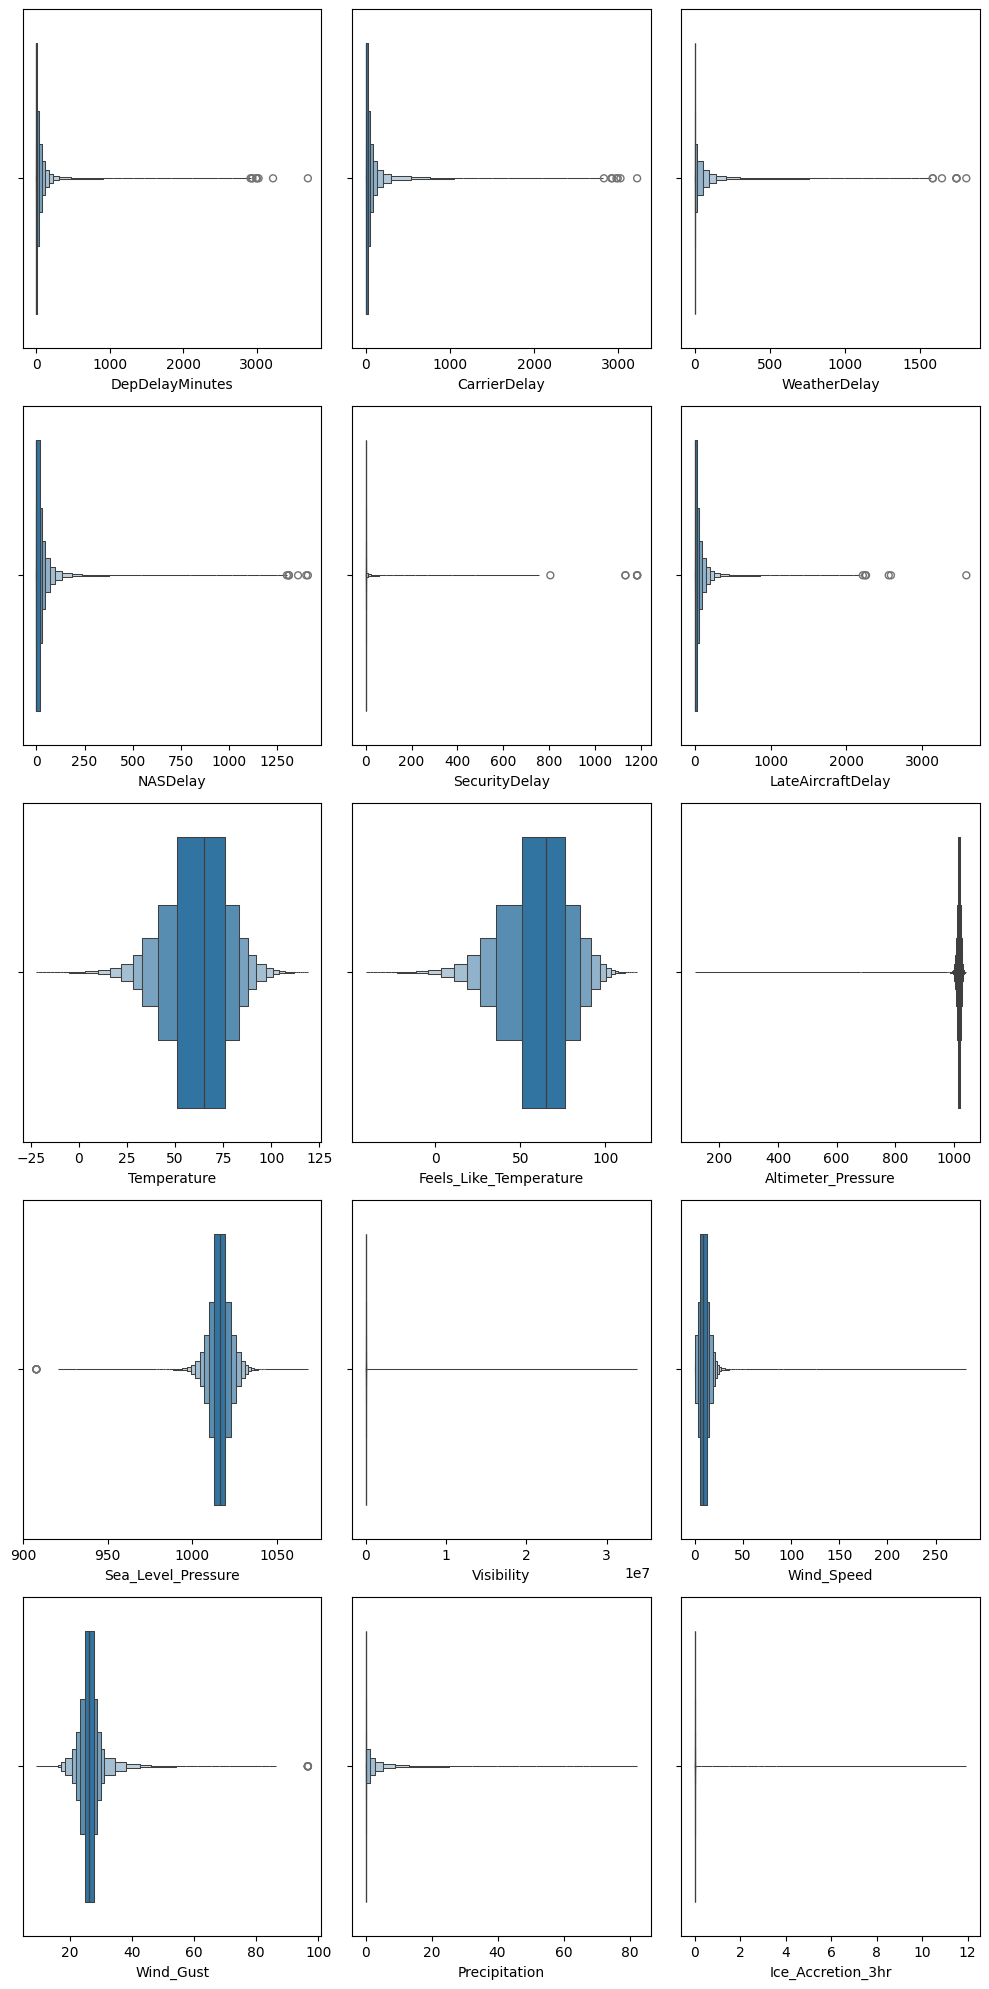

In [96]:
fig, axes = plt.subplots(nrows=5,ncols=3, figsize=(10,20))

axes= axes.flatten()

num_features = df[['DepDelayMinutes', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr']]


for i, col in enumerate(num_features.columns):
    sns.boxenplot(data=num_features, x=col, ax=axes[i])

plt.tight_layout()
plt.show()


# Data Preprocessing

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [97]:
print(df.CancellationReason.unique())
df[df['DepDelayMinutes'].isnull()]['Delayed'].unique()

[nan 'Weather' 'Carrier' 'Security' 'National Air System']


array([False])

In [99]:
df['CancellationReason'].fillna('Not Cancelled', inplace=True)

In [100]:
print(df.CancellationReason.unique())

['Not Cancelled' 'Weather' 'Carrier' 'Security' 'National Air System']


## NaN Handling with Simple Imputer

In [101]:
df.isnull().sum()

Time                             0
Origin                           0
Dest                             0
Carrier                          0
Cancelled                        0
CancellationReason               0
Delayed                          0
DepDelayMinutes             328891
CarrierDelay              11870186
WeatherDelay              11870186
NASDelay                  11870186
SecurityDelay             11870186
LateAircraftDelay         11870186
Temperature                      0
Feels_Like_Temperature           0
Altimeter_Pressure               0
Sea_Level_Pressure               0
Visibility                       0
Wind_Speed                       0
Wind_Gust                        0
Precipitation                    0
Ice_Accretion_3hr                0
dtype: int64

In [109]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)

df_imputed = pd.DataFrame(zero_imputer.fit_transform(df), columns=df.columns)


In [110]:
df_imputed.isnull().sum()

Time                      0
Origin                    0
Dest                      0
Carrier                   0
Cancelled                 0
CancellationReason        0
Delayed                   0
DepDelayMinutes           0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
Temperature               0
Feels_Like_Temperature    0
Altimeter_Pressure        0
Sea_Level_Pressure        0
Visibility                0
Wind_Speed                0
Wind_Gust                 0
Precipitation             0
Ice_Accretion_3hr         0
dtype: int64

In [118]:
df_imputed[['DepDelayMinutes', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr']] = df_imputed[['DepDelayMinutes', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Temperature',
       'Feels_Like_Temperature', 'Altimeter_Pressure', 'Sea_Level_Pressure',
       'Visibility', 'Wind_Speed', 'Wind_Gust', 'Precipitation',
       'Ice_Accretion_3hr']].astype(float)

df_imputed.dtypes


Time                       object
Origin                     object
Dest                       object
Carrier                    object
Cancelled                  object
CancellationReason         object
Delayed                    object
DepDelayMinutes           float64
CarrierDelay              float64
WeatherDelay              float64
NASDelay                  float64
SecurityDelay             float64
LateAircraftDelay         float64
Temperature               float64
Feels_Like_Temperature    float64
Altimeter_Pressure        float64
Sea_Level_Pressure        float64
Visibility                float64
Wind_Speed                float64
Wind_Gust                 float64
Precipitation             float64
Ice_Accretion_3hr         float64
dtype: object

## Investigating Duplicates


In [78]:
df_imputed.duplicated().sum()

np.int64(705220)

In [79]:
df_imputed[df_imputed.duplicated()]

#not real duplicates as time is different - how to tell at scale

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
18,2021-01-08 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.56,-0.554217,0.738126,-0.153846,-6437.36,-0.667149,-0.440972,0.0,0.0
35,2021-01-22 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.32,-0.317269,0.086008,-0.153846,-1609.34,-0.167873,-0.440972,0.0,0.0
101,2021-01-08 09:00:00,LAX,HNL,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.56,-0.554217,0.738126,-0.153846,-6437.36,-0.667149,-0.440972,0.0,0.0
118,2021-01-22 09:00:00,LAX,HNL,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.32,-0.317269,0.086008,-0.153846,-1609.34,-0.167873,-0.440972,0.0,0.0
224,2021-01-22 09:00:00,LAX,KOA,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.32,-0.317269,0.086008,-0.153846,-1609.34,-0.167873,-0.440972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15137677,2023-09-15 12:00:00,MSP,PHX,Delta Air Lines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.12,-0.116466,0.129653,-0.061538,-3218.68,0.166425,0.677083,0.0,0.0
15138125,2023-09-15 12:00:00,MSP,BNA,Delta Air Lines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.12,-0.116466,0.129653,-0.061538,-3218.68,0.166425,0.677083,0.0,0.0
15142825,2023-09-15 12:00:00,MSP,FSD,SkyWest Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,-0.12,-0.116466,0.129653,-0.061538,-3218.68,0.166425,0.677083,0.0,0.0
15142893,2023-09-15 12:00:00,MSP,RST,SkyWest Airlines Inc.,False,Not Cancelled,True,0.3,0.0,0.0,...,0.0,-0.12,-0.116466,0.129653,-0.061538,-3218.68,0.166425,0.677083,0.0,0.0


# Feature Engineering WeatherDelayed

In [127]:
#Renaming WeatherDelay to Weather_Delay_Length
df_imputed = df_imputed.rename(columns={'WeatherDelay':'Weather_Delay_Length'})
df_imputed.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,Weather_Delay_Length,...,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Weather_Delyaed
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,56.0,55.9,1020.32,1020.1,16093.40,0.0,24.97,0.0,0.0,NaN
1,2021-01-02 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,True,2.0,0.0,0.0,...,54.0,54.0,1025.74,1025.5,16093.40,0.0,24.97,0.0,0.0,NaN
2,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,True,28.0,28.0,0.0,...,52.0,52.0,1024.38,1015.2,4828.02,4.6,24.97,0.0,0.0,NaN
3,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,True,28.0,28.0,0.0,...,53.0,53.1,1024.38,1024.1,6437.36,4.6,24.97,0.0,0.0,NaN
4,2021-01-04 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,51.0,51.1,1023.03,1015.2,6437.36,4.6,24.97,0.0,0.0,NaN


In [130]:


df_imputed['Weather_Delayed'] =  df_imputed.apply(lambda row: True if row['Weather_Delay_Length'] > 0 else False, axis=1)

df_imputed[df_imputed['Weather_Delay_Length'] > 0.0].head(10)

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,Weather_Delay_Length,...,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Weather_Delyaed,Weather_Delayed
395,2021-01-26 00:00:00,LAX,ORD,American Airlines Inc.,False,Not Cancelled,True,355.0,0.0,343.0,...,43.02,1009.14,1009.2,16093.40,5.75,24.97,0.0,0.0,NaN,True
3357,2021-01-06 09:00:00,LAX,JFK,Delta Air Lines Inc.,False,Not Cancelled,True,24.0,0.0,24.0,...,54.00,1021.00,1015.2,804.67,5.75,24.97,0.0,0.0,NaN,True
3358,2021-01-06 09:00:00,LAX,JFK,Delta Air Lines Inc.,False,Not Cancelled,True,24.0,0.0,24.0,...,54.00,1021.00,1021.0,6437.36,4.60,24.97,0.0,0.0,NaN,True
3359,2021-01-06 09:00:00,LAX,JFK,Delta Air Lines Inc.,False,Not Cancelled,True,24.0,0.0,24.0,...,55.00,1021.33,1015.2,804.67,4.60,24.97,0.0,0.0,NaN,True
3367,2021-01-06 08:00:00,LAX,HNL,Delta Air Lines Inc.,False,Not Cancelled,True,9.0,0.0,9.0,...,51.10,1020.32,1015.2,2414.01,0.00,24.97,0.0,0.0,NaN,True
3368,2021-01-06 08:00:00,LAX,HNL,Delta Air Lines Inc.,False,Not Cancelled,True,9.0,0.0,9.0,...,51.10,1020.32,1015.2,8046.70,0.00,24.97,0.0,0.0,NaN,True
3369,2021-01-06 08:00:00,LAX,HNL,Delta Air Lines Inc.,False,Not Cancelled,True,9.0,0.0,9.0,...,51.10,1020.32,1020.4,8046.70,0.00,24.97,0.0,0.0,NaN,True
6049,2021-01-02 11:00:00,LAX,EGE,SkyWest Airlines Inc.,False,Not Cancelled,True,114.0,0.0,109.0,...,60.10,1024.72,1024.7,16093.40,4.60,24.97,0.0,0.0,NaN,True
6543,2021-01-10 06:00:00,LAX,PDX,SkyWest Airlines Inc.,False,Not Cancelled,True,18.0,0.0,16.0,...,53.10,1020.66,1020.5,16093.40,4.60,24.97,0.0,0.0,NaN,True
6544,2021-01-19 10:00:00,LAX,SEA,SkyWest Airlines Inc.,False,Not Cancelled,True,23.0,0.0,24.0,...,59.00,1008.47,1008.3,16093.40,4.60,24.97,0.0,0.0,NaN,True


# Exporting Cleaned Data to CSV within Data Directory


In [140]:
data_directory = '../data/'

output_csv = 'preprocessed_with_outliers.csv'

output_path = os.path.join(data_directory, output_csv)

df_imputed.to_csv(output_path, header=True, index=False, compression='zip')

# Splitting Train and Test

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [142]:
#defining X feature df and Y target series

X = df_imputed.drop(columns=['Weather_Delayed', 'Weather_Delay_Length'])
y = df_imputed['Weather_Delayed']

In [146]:
X.head(1)

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,NASDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,56.0,55.9,1020.32,1020.1,16093.4,0.0,24.97,0.0,0.0


In [147]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Weather_Delayed, dtype: bool

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [160]:
X_train_num_cols = X_train.select_dtypes(include=float)
X_test_num_cols = X_test.select_dtypes(include=float)

In [167]:
rscaler = RobustScaler()

X_train_num_cols_scaled = rscaler.fit_transform(X_train_num_cols)
X_test_num_cols_scaled = rscaler.transform(X_test_num_cols)

X_train_rs = pd.DataFrame(X_train_num_cols_scaled , columns=X_train_num_cols.columns)
X_test_rs = pd.DataFrame(X_test_num_cols_scaled, columns=X_test_num_cols.columns)


In [168]:
#joining data

X_train_obj = X_train.select_dtypes(include=object)
X_test_obj = X_test.select_dtypes(include=object)

X_train_rs = X_train_obj.join(X_train_rs, how='left')
X_test_rs = X_test_obj.join(X_test_rs, how='left')


In [172]:
X_test_rs.head(20)

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,NASDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
6410850,2022-07-29 09:00:00,DEN,AUS,American Airlines Inc.,False,Not Cancelled,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10031576,2023-10-04 14:00:00,ATL,HSV,Endeavor Air Inc.,False,Not Cancelled,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7156023,2022-04-17 11:00:00,CLT,IND,Republic Airline,False,Not Cancelled,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6191952,2022-10-12 19:00:00,DEN,DTW,Southwest Airlines Co.,False,Not Cancelled,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5208788,2022-10-01 12:00:00,IAH,CLT,American Airlines Inc.,False,Not Cancelled,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7988336,2021-07-24 09:00:00,MCO,IND,Spirit Air Lines,False,Not Cancelled,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137107,2021-06-19 21:00:00,LAX,LAS,Delta Air Lines Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,0.52,0.530120,-2.347882,-3.092308,-9656.04,0.832127,0.079861,0.00,0.0
13126725,2023-07-04 19:00:00,BNA,STL,Southwest Airlines Co.,False,Not Cancelled,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4622098,2023-12-19 22:00:00,SEA,ATL,Delta Air Lines Inc.,False,Not Cancelled,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2487986,2022-04-05 21:00:00,MIA,BWI,American Airlines Inc.,False,Not Cancelled,True,3.6,25.0,4.0,...,11.0,-0.56,-0.554217,0.781772,0.907692,0.00,0.998553,0.878472,0.00,0.0


# Balancing